In [1]:
pip install shap


Note: you may need to restart the kernel to use updated packages.


In [91]:
print(X_train.columns.tolist())


['T_offset1', 'Max1R13_1', 'Max1L13_1', 'aveAllR13_1', 'aveAllL13_1', 'T_RC1', 'T_RC_Dry1', 'T_RC_Wet1', 'T_RC_Max1', 'T_LC1', 'T_LC_Dry1', 'T_LC_Wet1', 'T_LC_Max1', 'RCC1', 'LCC1', 'canthiMax1', 'canthi4Max1', 'T_FHCC1', 'T_FHRC1', 'T_FHLC1', 'T_FHBC1', 'T_FHTC1', 'T_FH_Max1', 'T_FHC_Max1', 'T_Max1', 'T_OR1', 'T_OR_Max1', 'T_offset2', 'Max1R13_2', 'Max1L13_2', 'aveAllR13_2', 'aveAllL13_2', 'T_RC2', 'T_RC_Dry2', 'T_RC_Wet2', 'T_RC_Max2', 'T_LC2', 'T_LC_Dry2', 'T_LC_Wet2', 'T_LC_Max2', 'RCC2', 'LCC2', 'canthiMax2', 'canthi4Max2', 'T_FHCC2', 'T_FHRC2', 'T_FHLC2', 'T_FHBC2', 'T_FHTC2', 'T_FH_Max2', 'T_FHC_Max2', 'T_Max2', 'T_OR2', 'T_OR_Max2', 'T_offset3', 'Max1R13_3', 'Max1L13_3', 'aveAllR13_3', 'aveAllL13_3', 'T_RC3', 'T_RC_Dry3', 'T_RC_Wet3', 'T_RC_Max3', 'T_LC3', 'T_LC_Dry3', 'T_LC_Wet3', 'T_LC_Max3', 'RCC3', 'LCC3', 'canthiMax3', 'canthi4Max3', 'T_FHCC3', 'T_FHRC3', 'T_FHLC3', 'T_FHBC3', 'T_FHTC3', 'T_FH_Max3', 'T_FHC_Max3', 'T_Max3', 'T_OR3', 'T_OR_Max3', 'T_offset4', 'Max1R13_4', '

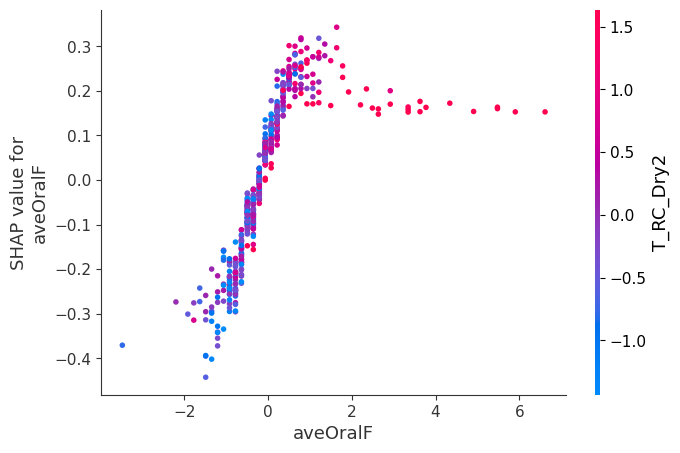

In [101]:
feature_name = "aveOralF"  # <-- Replace with a real one from your dataset
shap.dependence_plot(
    ind=feature_name,
    shap_values=shap_values,
    features=X_train,
    display_features=X_train
)



Available Features:
 ['T_offset1', 'Max1R13_1', 'Max1L13_1', 'aveAllR13_1', 'aveAllL13_1', 'T_RC1', 'T_RC_Dry1', 'T_RC_Wet1', 'T_RC_Max1', 'T_LC1', 'T_LC_Dry1', 'T_LC_Wet1', 'T_LC_Max1', 'RCC1', 'LCC1', 'canthiMax1', 'canthi4Max1', 'T_FHCC1', 'T_FHRC1', 'T_FHLC1', 'T_FHBC1', 'T_FHTC1', 'T_FH_Max1', 'T_FHC_Max1', 'T_Max1', 'T_OR1', 'T_OR_Max1', 'T_offset2', 'Max1R13_2', 'Max1L13_2', 'aveAllR13_2', 'aveAllL13_2', 'T_RC2', 'T_RC_Dry2', 'T_RC_Wet2', 'T_RC_Max2', 'T_LC2', 'T_LC_Dry2', 'T_LC_Wet2', 'T_LC_Max2', 'RCC2', 'LCC2', 'canthiMax2', 'canthi4Max2', 'T_FHCC2', 'T_FHRC2', 'T_FHLC2', 'T_FHBC2', 'T_FHTC2', 'T_FH_Max2', 'T_FHC_Max2', 'T_Max2', 'T_OR2', 'T_OR_Max2', 'T_offset3', 'Max1R13_3', 'Max1L13_3', 'aveAllR13_3', 'aveAllL13_3', 'T_RC3', 'T_RC_Dry3', 'T_RC_Wet3', 'T_RC_Max3', 'T_LC3', 'T_LC_Dry3', 'T_LC_Wet3', 'T_LC_Max3', 'RCC3', 'LCC3', 'canthiMax3', 'canthi4Max3', 'T_FHCC3', 'T_FHRC3', 'T_FHLC3', 'T_FHBC3', 'T_FHTC3', 'T_FH_Max3', 'T_FHC_Max3', 'T_Max3', 'T_OR3', 'T_OR_Max3', 'T_of

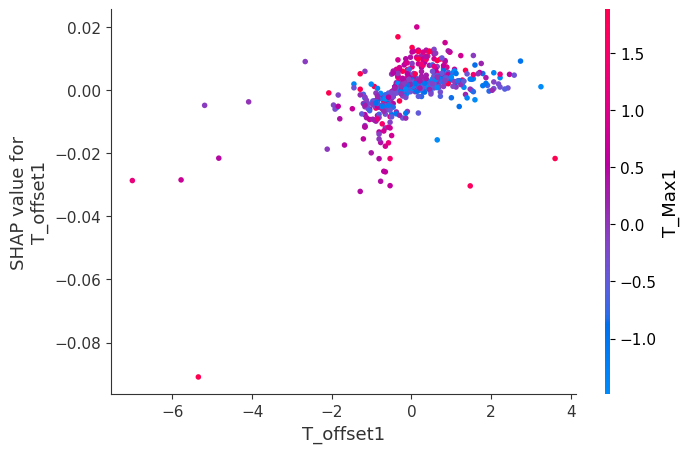

In [103]:
import pandas as pd
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 1: Load the dataset (assuming column names are in 3rd row)
df = pd.read_csv("ICI_groups1and2.csv", header=2)

# Step 2: Clean dataset
df = df.dropna(axis=1, how='all')  # Drop empty columns
df = df.loc[:, ~df.columns.duplicated()]  # Drop duplicate columns
df = df.drop(columns=[col for col in ['SubjectID', 'Time', 'Date'] if col in df.columns], errors='ignore')

# Step 3: Encode categorical columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Step 4: Drop rows with many missing values and fill the rest
df = df.dropna(thresh=int(0.8 * len(df.columns)))
df.fillna(df.median(numeric_only=True), inplace=True)

# Step 5: Set up features and target
target = 'aveOralM'  # Replace with your actual target column name
X = df.drop(columns=[target])
y = df[target]

# Step 6: Scale features
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 8: Train XGBoost Regressor
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 9: Compute SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Step 10: Check available features
print("\nAvailable Features:\n", X_train.columns.tolist())

# Step 11: Choose a feature for PDP
feature_name = X_train.columns[0]  # Replace with any valid feature name

# Step 12: Generate SHAP PDP (Partial Dependence Plot)
shap.dependence_plot(
    ind=feature_name,
    shap_values=shap_values,
    features=X_train,
    display_features=X_train
)


In [113]:
import numpy as np
import pandas as pd

# Replace inf/-inf with NaN
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

# Drop columns that are completely NaN (if any)
X_train = X_train.dropna(axis=1, how='all')
X_test = X_test[X_train.columns]  # Keep same columns as train

# Fill remaining NaNs with column means
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())  # Use train means for consistency

# Identify and drop constant columns (zero variance)
constant_columns = X_train.loc[:, X_train.std() == 0].columns
X_train = X_train.drop(columns=constant_columns)
X_test = X_test.drop(columns=constant_columns)

# Now scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [115]:
print("Columns with NaNs after cleanup:", X_train.columns[X_train.isna().any()])
print("Columns with zero variance:", X_train.columns[X_train.std() == 0])

Columns with NaNs after cleanup: Index([], dtype='object')
Columns with zero variance: Index([], dtype='object')


R² Score: 0.764
RMSE: 0.230


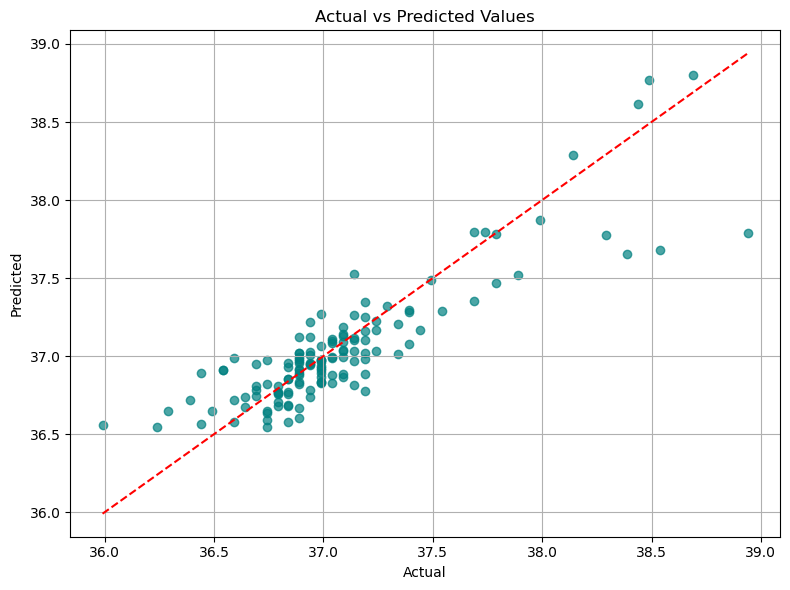

In [133]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset (assuming correct header row)
df = pd.read_csv("ICI_groups1and2.csv", header=2)

# Clean data
df = df.dropna(axis=1, how='all')
df = df.loc[:, ~df.columns.duplicated()]
df = df.drop(columns=[col for col in ['SubjectID', 'Time', 'Date'] if col in df.columns], errors='ignore')

# Encode categorical variables
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Drop rows with excessive NaNs and fill others
df = df.dropna(thresh=int(0.8 * len(df.columns)))
df.fillna(df.median(numeric_only=True), inplace=True)

# Define features and target
target = 'aveOralM'  # Replace if different
X = df.drop(columns=[target])
y = df[target]

# Scale features
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
# Evaluate
r2 = r2_score(y_test, y_pred)
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

# -----------------------------
# 📊 Plot: Actual vs Predicted
# -----------------------------
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.show()




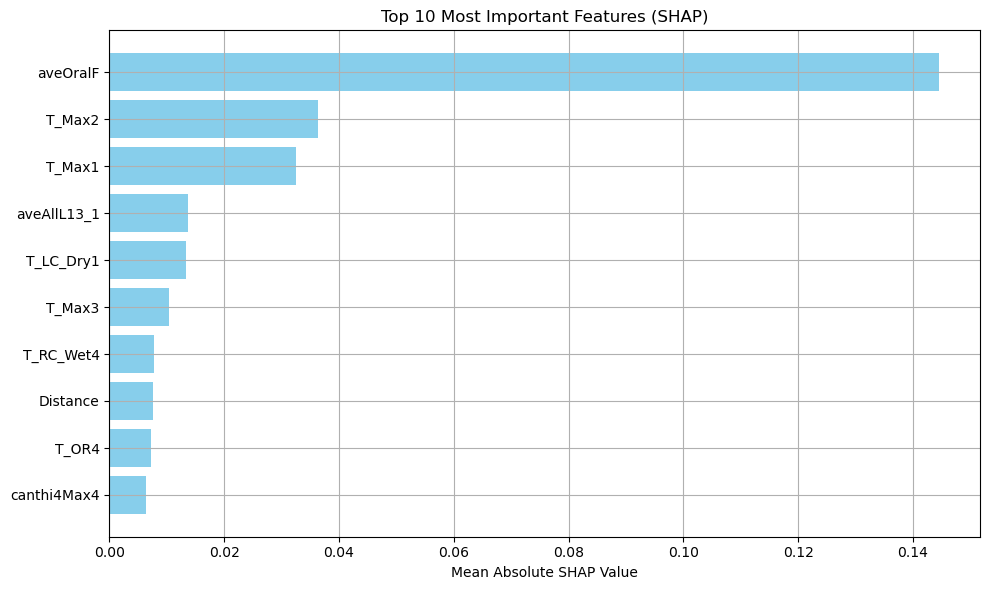

In [135]:
import numpy as np
import shap
import matplotlib.pyplot as plt

# Compute mean absolute SHAP value for each feature
shap_importance = np.abs(shap_values).mean(axis=0)
top_indices = np.argsort(shap_importance)[-10:][::-1]  # Top 10 indices

# Get corresponding feature names and values
top_features = X_train.columns[top_indices]
top_importance = shap_importance[top_indices]

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_features[::-1], top_importance[::-1], color='skyblue')
plt.xlabel("Mean Absolute SHAP Value")
plt.title("Top 10 Most Important Features (SHAP)")
plt.grid(True)
plt.tight_layout()
plt.show()


🔍 SHAP Dependence Plot for: aveOralF


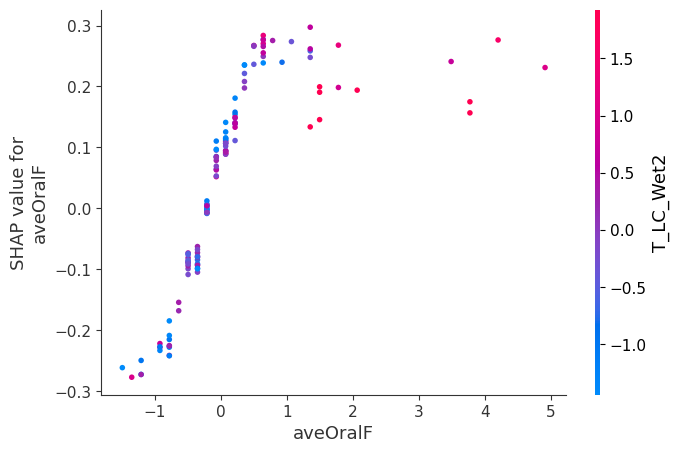

🔍 SHAP Dependence Plot for: T_Max2


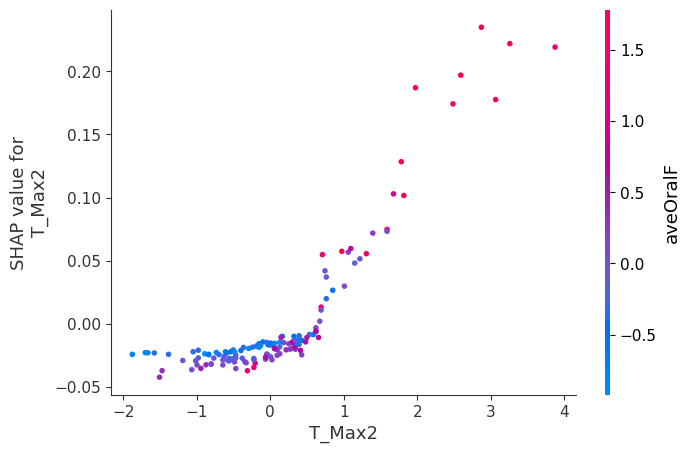

🔍 SHAP Dependence Plot for: T_Max1


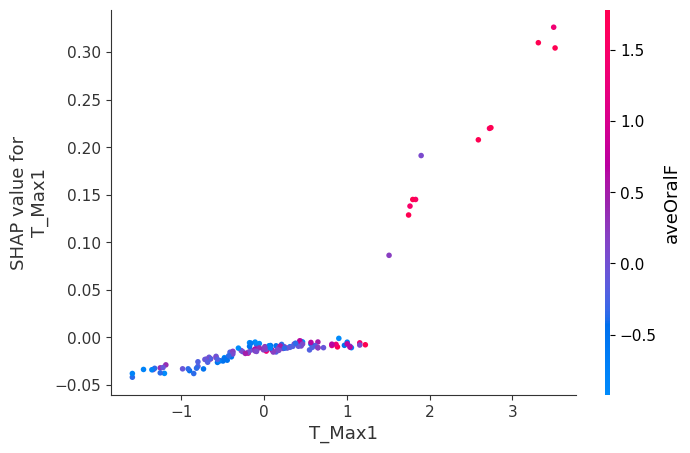

🔍 SHAP Dependence Plot for: aveAllL13_1


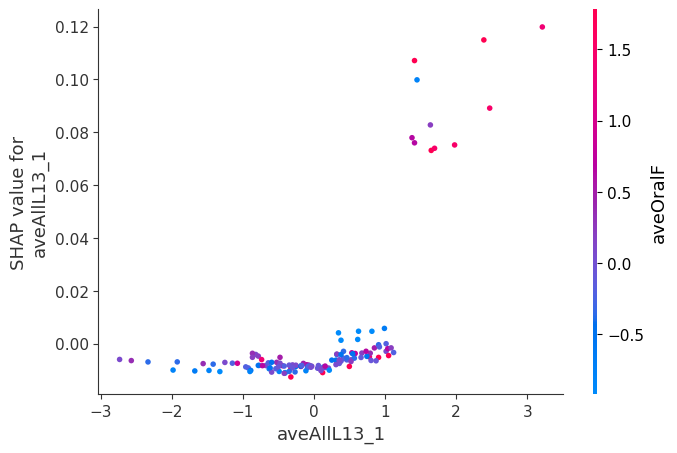

🔍 SHAP Dependence Plot for: T_LC_Dry1


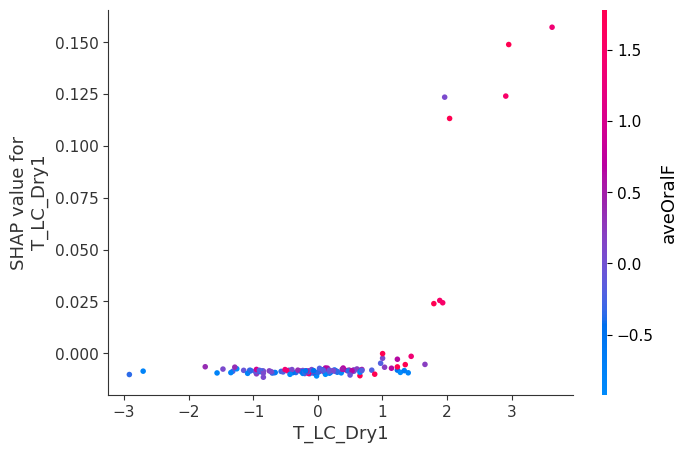

🔍 SHAP Dependence Plot for: T_Max3


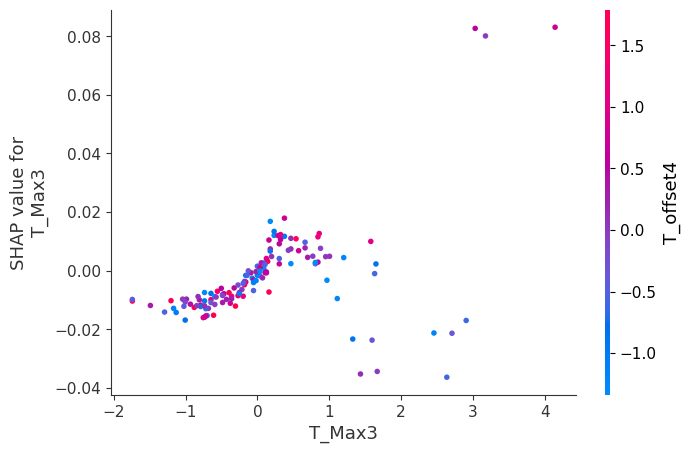

🔍 SHAP Dependence Plot for: T_RC_Wet4


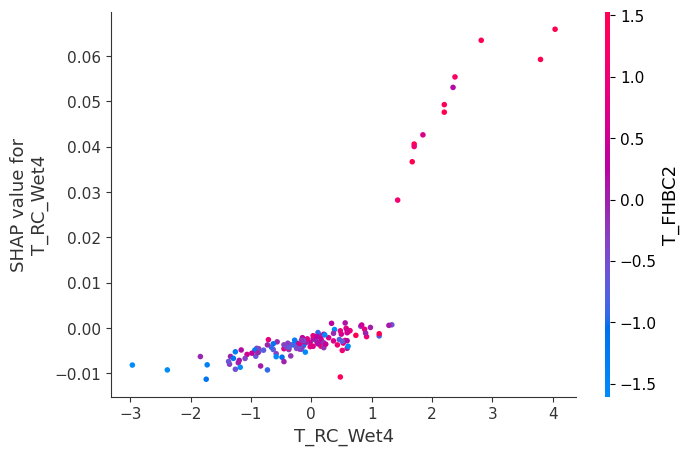

🔍 SHAP Dependence Plot for: Distance


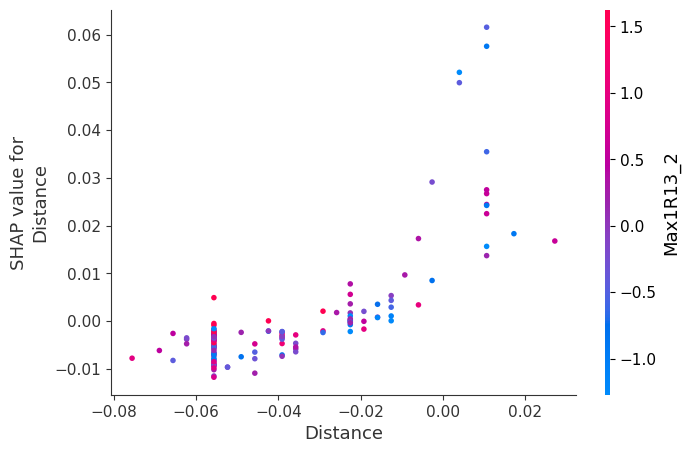

🔍 SHAP Dependence Plot for: T_OR4


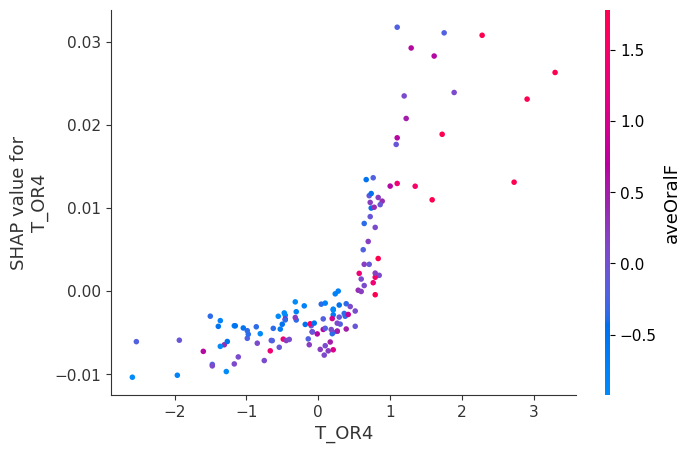

🔍 SHAP Dependence Plot for: canthi4Max4


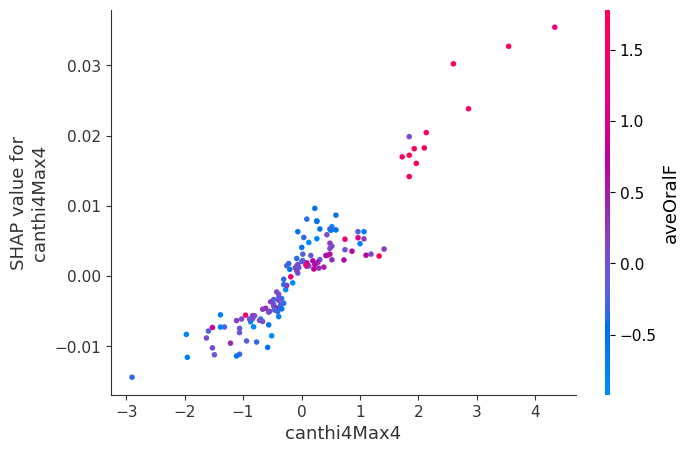

In [137]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Compute mean absolute SHAP value for each feature
shap_importance = np.abs(shap_values).mean(axis=0)
top_indices = np.argsort(shap_importance)[-10:][::-1]  # Top 10

# Feature names
top_features = X_test.columns[top_indices]

# Generate SHAP dependence plots
for feature in top_features:
    print(f"🔍 SHAP Dependence Plot for: {feature}")
    shap.dependence_plot(
        ind=feature,
        shap_values=shap_values,
        features=X_test,
        display_features=X_test
    )


R² Score: -0.170
RMSE: 6.933


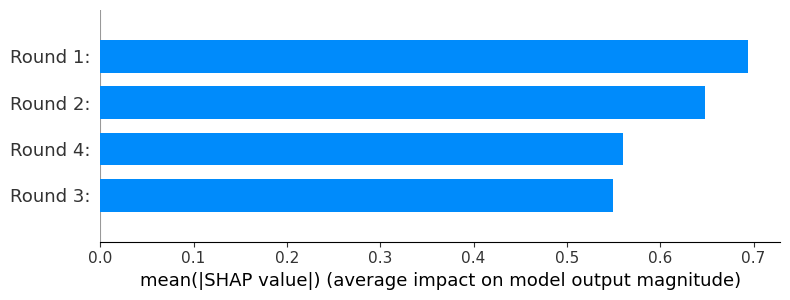

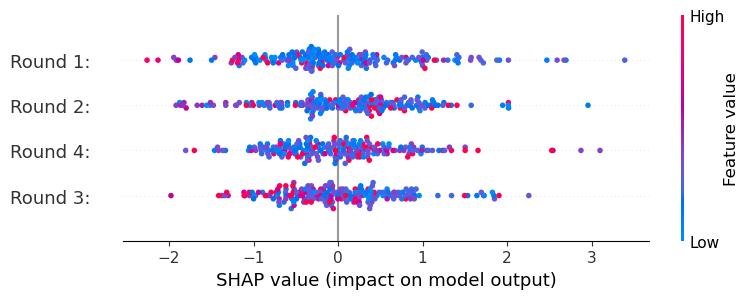

In [155]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import shap
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("ICI_groups1and2.csv")

# Drop completely empty or unnamed columns
df = df.dropna(axis=1, how='all')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Fill missing numeric values with median
df = df.fillna(df.median(numeric_only=True))

# Encode categorical variables if any
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Drop columns with only one unique value
df = df.loc[:, df.nunique() > 1]

# Split features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Scale the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluate model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

# --- SHAP Analysis ---
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

# Optional: SHAP force plot for first instance
# shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])


In [191]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)


In [253]:
import shap
import matplotlib.pyplot as plt

# Calculate SHAP values (already done)
# shap_values = explainer(X_test_scaled, check_additivity=False)

# Convert shap_values for class 1 (e.g., assuming binary classification) into DataFrame
shap_df = pd.DataFrame(shap_values[1], columns=X_test.columns)

# Optional: limit to top N most impactful features for readability
top_n = 20
mean_abs_shap = shap_df.abs().mean().sort_values(ascending=False)
top_features = mean_abs_shap.head(top_n).index

# Plot SHAP heatmap
plt.figure(figsize=(12, 8))
shap_values_subset = shap_df[top_features]

# Use seaborn for better heatmap visuals
import seaborn as sns
sns.heatmap(shap_values_subset, cmap='coolwarm', center=0)
plt.title("SHAP Heatmap for Top Features")
plt.xlabel("Features")
plt.ylabel("Samples")
plt.tight_layout()
plt.show()


ValueError: DataFrame constructor not properly called!

In [257]:
type(shap_values), len(shap_values), np.shape(shap_values[1])


(shap._explanation.Explanation, 135, (114, 2))

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Columns: 125 entries, SubjectID to Date
dtypes: float64(119), object(6)
memory usage: 985.5+ KB
None

Missing values:
SubjectID       0
unnamed_1    1009
T_offset1      54
Max1R13_1      53
Max1L13_1      53
             ... 
Humidity        0
Distance        2
Cosmetics      32
Time            0
Date            0
Length: 125, dtype: int64
Binning 0.001 GB of training data: 0.053 s
Fitting gradient boosted rounds:
Fit 1000 trees in 1.046 s, (11119 total leaves)
Time spent computing histograms: 0.221s
Time spent finding best splits:  0.273s
Time spent applying splits:      0.146s
Time spent predicting:           0.018s
Mean Squared Error: 0.0684
Root Mean Squared Error: 0.2615
R-squared Score: 0.5390


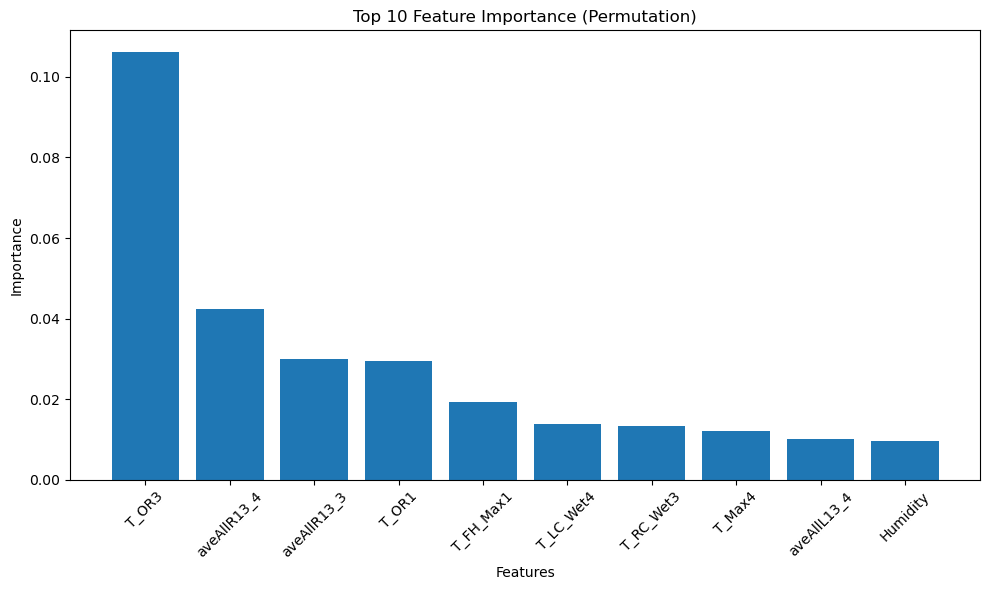


Top 10 Most Important Features:
         Feature  Importance
82         T_OR3    0.106205
88   aveAllR13_4    0.042399
60   aveAllR13_3    0.030046
26         T_OR1    0.029445
23     T_FH_Max1    0.019275
96     T_LC_Wet4    0.013913
64     T_RC_Wet3    0.013464
109       T_Max4    0.012117
89   aveAllL13_4    0.010070
117     Humidity    0.009584


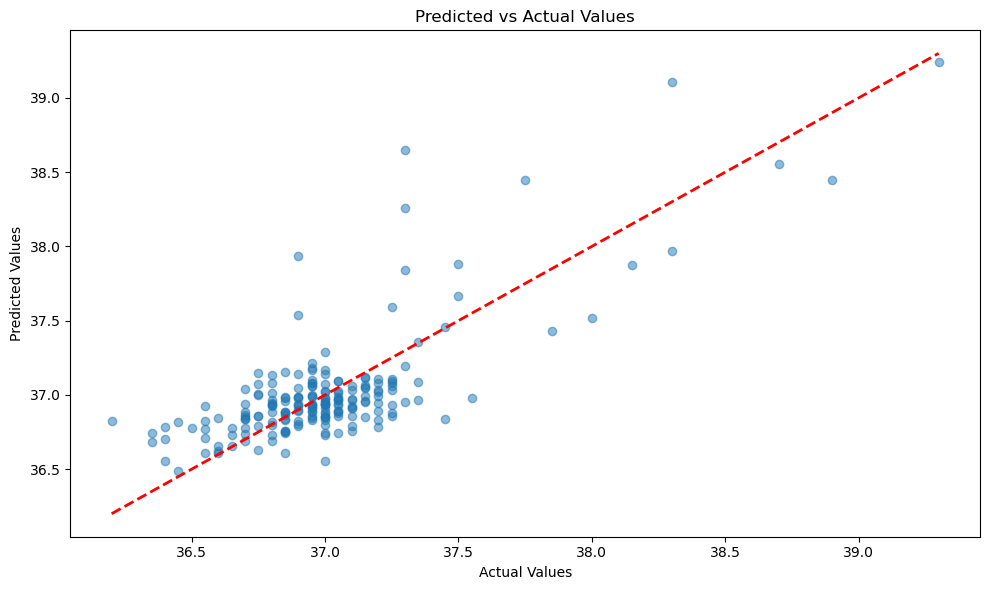

In [259]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance  # Added for feature importance
import matplotlib.pyplot as plt

# Load and fix the dataset
file_path = r"ICI_groups1and2.csv"
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    print("Please verify the file path and ensure the CSV file exists in that location")
    exit()

# Set column names from row 1 and handle duplicates
df.columns = df.iloc[1]
df = df.drop([0, 1]).reset_index(drop=True)

# Handle column names
columns = []
seen = {}
for col in df.columns:
    if pd.isna(col) or col == 'nan':
        col = f"unnamed_{len(seen)}"
    if col in seen:
        seen[col] += 1
        columns.append(f"{col}_{seen[col]}")
    else:
        seen[col] = 0
        columns.append(col)
df.columns = columns

# Convert numeric columns
categorical_cols = ['SubjectID', 'Gender', 'Ethnicity', 'Cosmetics', 'Time', 'Date']
numeric_columns = [col for col in df.columns if col not in categorical_cols]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Display basic information
print("Dataset Info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())

# Data Preprocessing
target = 'aveOralF'
features = [col for col in df.columns if col not in ['aveOralF', 'aveOralM', 'SubjectID', 'Time', 'Date']]

# Handle categorical variables
categorical_features = ['Gender', 'Ethnicity', 'Cosmetics']
for col in categorical_features:
    df[col] = df[col].astype('category')

# Handle missing values
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Split features and target
X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the HistGradientBoosting model
model = HistGradientBoostingRegressor(
    max_iter=1000,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    categorical_features=[X.columns.get_loc(col) for col in categorical_features],
    verbose=1
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared Score: {r2:.4f}")

# Feature Importance using permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': perm_importance.importances_mean
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xticks(rotation=45)
plt.title('Top 10 Feature Importance (Permutation)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance_df.head(10))

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.tight_layout()
plt.show()

In [261]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import preprocessing

# Load and clean dataset (Assuming previous cleaning steps)
df = pd.read_csv("ICI_groups1and2.csv", skiprows=1)
df = df.dropna(axis=1, how="all")
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)

# Replace with actual target column after printing df.columns
target_column = "SubjectID"

# Ensure correct target column
if target_column not in df.columns:
    raise KeyError(f"Target column '{target_column}' not found. Available columns: {df.columns}")

# Convert categorical data to numerical (if necessary)
df = df.apply(lambda col: preprocessing.LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

# Split dataset
X = df.drop(columns=[target_column])
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
clf = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [263]:
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)


|--- canthiMax3 <= 0.50
|   |--- class: 169
|--- canthiMax3 >  0.50
|   |--- T_offset2 <= 0.50
|   |   |--- T_RC1 <= 68.50
|   |   |   |--- class: 372
|   |   |--- T_RC1 >  68.50
|   |   |   |--- RCC1 <= 125.50
|   |   |   |   |--- class: 414
|   |   |   |--- RCC1 >  125.50
|   |   |   |   |--- class: 87
|   |--- T_offset2 >  0.50
|   |   |--- T_atm <= 1.50
|   |   |   |--- class: 387
|   |   |--- T_atm >  1.50
|   |   |   |--- RCC4 <= 3.00
|   |   |   |   |--- class: 458
|   |   |   |--- RCC4 >  3.00
|   |   |   |   |--- class: 0



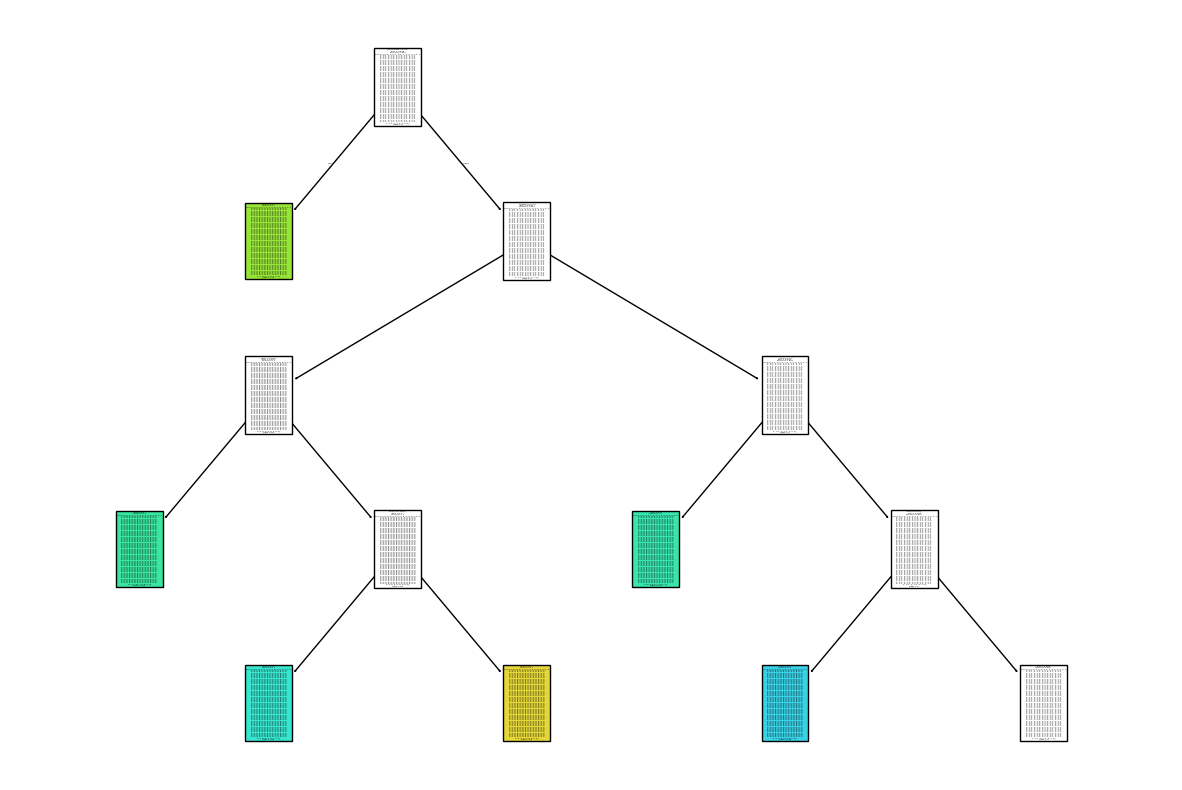

In [265]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=[str(cls) for cls in np.unique(y)], filled=True)

plt.show()

In [267]:
#The top node (root node) is where the decision-making starts. It represents the entire dataset and the first feature used for splitting.

#Each internal node represents a decision or split based on a specific feature.

#Each branch represents the outcome of a decision, leading to further splits or a final classification.

#Each leaf node (colored boxes) represents the final decision or output of the model.

In [269]:
#If the tree is shallow (few levels), it means the model makes decisions with fewer splits.

#If the tree is deep (many levels), it means the model is more complex and could be prone to overfitting.

#The number of splits and depth affect the model's interpretability and performance.
#The color intensity indicates the purity of the node.

#Darker colors → More confident predictions (higher dominance of one class).

#Lighter colors → More mixed class distributions (less confidence).

#Different colors represent different predicted classes.

In [271]:
pip install scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing  # Example dataset

In [5]:
# Load dataset (example: California Housing dataset)
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names  # Feature names for reference

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Initialize and train the Decision Tree model
tree_regressor = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_regressor.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=4, random_state=42)

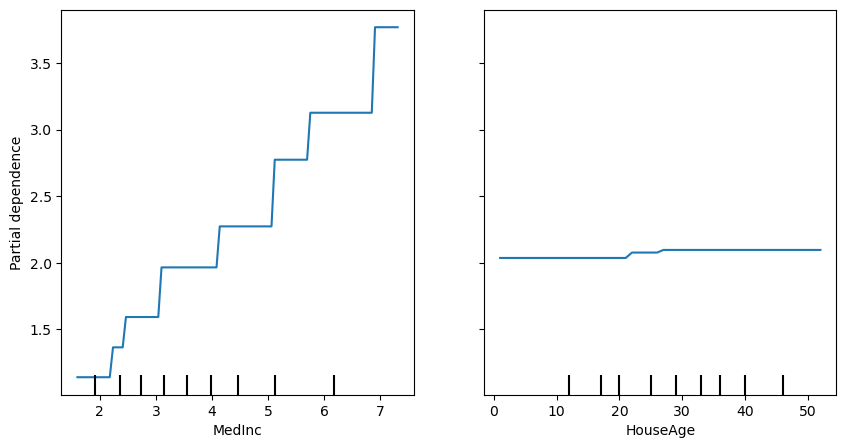

In [9]:
# Select features for PDP visualization
features_to_plot = [0, 1]  # Example: Feature indices (replace with actual feature indices)

# Create PDP plot
fig, ax = plt.subplots(figsize=(10, 5))
PartialDependenceDisplay.from_estimator(tree_regressor, X_train, features_to_plot,
                                        feature_names=feature_names, ax=ax)
plt.show()


In [11]:
#The x-axis represents the feature values.

#The y-axis represents the predicted output.

#The PDP curve shows how changes in the selected feature impact the prediction, marginalizing over all other features.

In [101]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import shap
import matplotlib.pyplot as plt

# 1. Clean your data
X_train = X_train.replace([np.inf, -np.inf], np.nan).fillna(X_train.mean())
X_test = X_test.replace([np.inf, -np.inf], np.nan).fillna(X_train.mean())
X_test = X_test[X_train.columns]  # ensure same columns

# 2. Scale
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# 3. Drop zero-variance columns
non_constant_columns = X_train_scaled.loc[:, X_train_scaled.std() > 0].columns
X_train_scaled = X_train_scaled[non_constant_columns]
X_test_scaled = X_test_scaled[non_constant_columns]

# 4. Initialize SHAP for regression
explainer = shap.Explainer(model.predict, X_train_scaled)

# 5. Explain an instance
idx = 1  # Index of the instance to explain
shap_values = explainer(X_test_scaled)

# Create a force plot for the specific instance
shap.force_plot(
    explainer.expected_value,
    shap_values.values[idx],
    X_test_scaled.iloc[idx],
    feature_names=non_constant_columns,
    matplotlib=True
)
plt.title(f"SHAP Force Plot for Instance {idx}")
plt.tight_layout()
plt.show()

# Optional: Summary plot for global interpretation
shap.summary_plot(shap_values, X_test_scaled, feature_names=non_constant_columns)
plt.title("SHAP Summary Plot for Regression Model")
plt.tight_layout()
plt.show()

ValueError: columns are missing: {'numerical_1', 'numerical_2', 'categorical'}

In [103]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import shap
import matplotlib.pyplot as plt

# 1. Clean your data
X_train = X_train.replace([np.inf, -np.inf], np.nan).fillna(X_train.mean())
X_test = X_test.replace([np.inf, -np.inf], np.nan).fillna(X_train.mean())
X_test = X_test[X_train.columns]  # ensure same columns

# 2. Scale
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# 3. Drop zero-variance columns
non_constant_columns = X_train_scaled.loc[:, X_train_scaled.std() > 0].columns
X_train_scaled = X_train_scaled[non_constant_columns]
X_test_scaled = X_test_scaled[non_constant_columns]

# 4. Train a regression model (if not already trained)
# Assuming model is not defined; train it here
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)  # Ensure y_train is defined

# 5. Initialize SHAP for regression
explainer = shap.Explainer(model.predict, X_train_scaled)

# 6. Explain an instance
idx = 1  # Index of the instance to explain
shap_values = explainer(X_test_scaled)

# Create a force plot for the specific instance
shap.force_plot(
    explainer.expected_value,
    shap_values.values[idx],
    X_test_scaled.iloc[idx],
    feature_names=non_constant_columns,
    matplotlib=True
)
plt.title(f"SHAP Force Plot for Instance {idx}")
plt.tight_layout()
plt.show()

# Optional: Summary plot for global interpretation
shap.summary_plot(shap_values, X_test_scaled, feature_names=non_constant_columns)
plt.title("SHAP Summary Plot for Regression Model")
plt.tight_layout()
plt.show()

AttributeError: 'ExactExplainer' object has no attribute 'expected_value'